In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels 
import statsmodels.api as sm
import sklearn

In [2]:
advertising = pd.read_csv("advertising.csv")

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

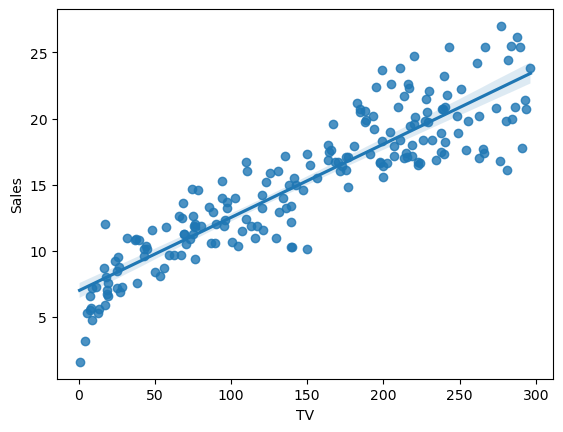

In [7]:
## Test
sns.regplot(x="TV", y="Sales", data=advertising)

<Axes: xlabel='Radio', ylabel='Sales'>

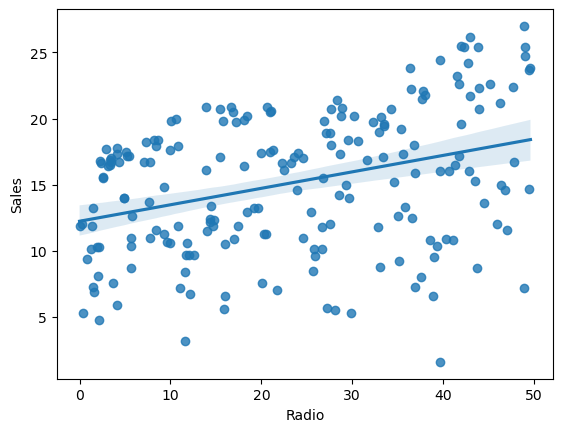

In [8]:
## Test
sns.regplot(x="Radio", y="Sales", data=advertising)

<Axes: xlabel='TV', ylabel='Newspaper'>

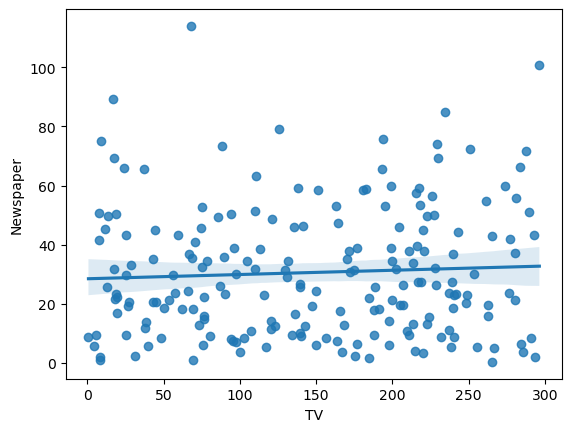

In [9]:
## Test
sns.regplot(x="TV", y="Newspaper", data=advertising)

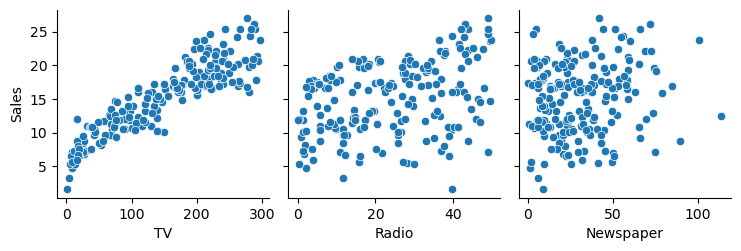

In [10]:
sns.pairplot(data=advertising, x_vars=["TV","Radio","Newspaper"], y_vars="Sales")

In [11]:
 advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

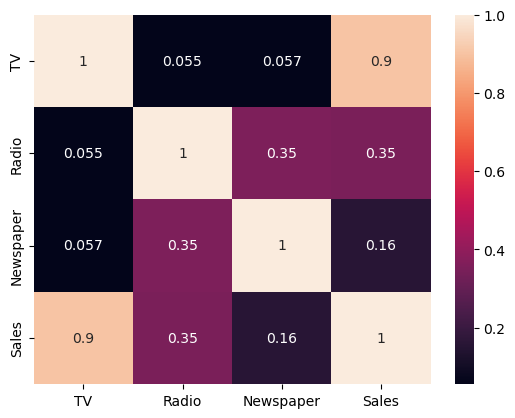

In [12]:
sns.heatmap(advertising.corr(),annot=True)

In [13]:
'''
Step 2 Perform simple Linear Regration 
Equation of linear regration 
y=c+m1x1 + m2x2 + ... + mnxn

y is the response 
c is the intercept
m1 is coefficient for the first feature
mn is the coefficient for the nth feature

in our case:

y = c+ m1 * TV

then m values are called the model coeffients or model parameters
'''

'\nStep 2 Perform simple Linear Regration \nEquation of linear regration \ny=c+m1x1 + m2x2 + ... + mnxn\n\ny is the response \nc is the intercept\nm1 is coefficient for the first feature\nmn is the coefficient for the nth feature\n\nin our case:\n\ny = c+ m1 * TV\n\nthen m values are called the model coeffients or model parameters\n'

Steps:
- create x and Y
- Create train and test sets (70-30, 80-20)
-Train your model on training set (i.e learn the coefficients)
-Evaluate the model (Training set, test set)

In [14]:
# Create x and y
X = advertising['TV']
y = advertising["Sales"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
X_train.shape

(140,)

In [17]:
y_train.shape

(140,)

In [18]:
X_test.shape

(60,)

In [19]:
y_test.shape

(60,)

In [20]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [21]:
#Fitting the model 
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [22]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.52e-52
Time:                        17:05:30   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

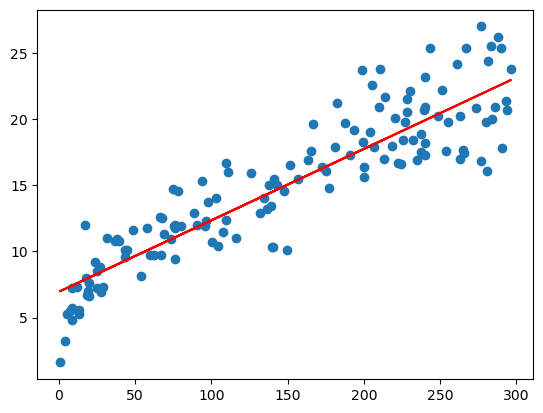

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [27]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [28]:
# https://en.wikipedia.org/wiki/F-test
